In [1]:
import pandas as pd

df = pd.read_csv("../results.csv")
# strip column names
df.columns = [
    col.strip() for col in df.columns
]
df["player_1_won"] = df["player_1_won"] == " True"
df["player_2_won"] = ~df["player_1_won"]
df

,id,player_1_model,player_1_temperature,player_2_model,player_2_temperature,player_1_won,player_2_won
0,20240328172609,claude_3_haiku,0.0,cohere_command,0.0,False,True
1,20240328172713,ai21_mid,0.0,claude_3_haiku,0.0,False,True
2,20240328172748,ai21_ultra,0.0,ai21_ultra,0.0,False,True
3,20240328172841,titan_express,0.0,ai21_mid,0.0,False,True
4,20240328172927,claude_2_1,0.0,cohere_light,0.0,False,True
...,...,...,...,...,...,...,...
308,20240329142837,titan_express,0.0,cohere_light,0.0,False,True
309,20240329142926,claude_2,0.0,cohere_command,0.0,False,True
310,20240329143012,ai21_ultra,0.0,mistral_8x7b,0.0,False,True
311,20240329151731,claude_instant,0.0,claude_3_haiku,0.0,False,True


In [2]:
df["player_1_won"].value_counts()

False    313
Name: player_1_won, dtype: int64

In [3]:
# Compute the number of wins for each model 

unique_models = df["player_1_model"].unique().tolist()
unique_models += df["player_2_model"].unique().tolist()
unique_models = list(set(unique_models))

# For each model, compute the number of wins (player_1 won if it's player 1), the number of games played and the win rate
results = []
for model in unique_models:
    games_played = 0
    wins = 0
    for i, row in df.iterrows():
        if row["player_1_model"] == model and row["player_2_model"] != model:
            games_played += 1
            if row["player_1_won"]:
                wins += 1
            continue
        if row["player_2_model"] == model and row["player_1_model"] != model:
            games_played += 1
            if row["player_2_won"]:
                wins += 1
            continue
    win_rate = wins / games_played
    results.append({
        "model": model,
        "games_won": wins,
        "games_played": games_played,
        "win_rate": win_rate
    })

# Cast to df 
results_df = pd.DataFrame(results)
results_df.sort_values(by="win_rate", ascending=False, inplace=True)
results_df = results_df[results_df["games_played"] > 1]
results_df

,model,games_won,games_played,win_rate
11,claude_3_haiku,30,51,0.588235
8,cohere_light,34,58,0.586207
7,ai21_ultra,24,43,0.558140
6,claude_3_sonnet,26,47,0.553191
10,claude_instant,23,42,0.547619
9,claude_2,25,46,0.543478
0,cohere_command,18,36,0.500000
1,titan_lite,23,47,0.489362
2,mistral_8x7b,24,50,0.480000
3,mistral_7b,23,48,0.479167


In [4]:
print(results_df.to_markdown())

|    | model           |   games_won |   games_played |   win_rate |
|---:|:----------------|------------:|---------------:|-----------:|
| 11 | claude_3_haiku  |          30 |             51 |   0.588235 |
|  8 | cohere_light    |          34 |             58 |   0.586207 |
|  7 | ai21_ultra      |          24 |             43 |   0.55814  |
|  6 | claude_3_sonnet |          26 |             47 |   0.553191 |
| 10 | claude_instant  |          23 |             42 |   0.547619 |
|  9 | claude_2        |          25 |             46 |   0.543478 |
|  0 | cohere_command  |          18 |             36 |   0.5      |
|  1 | titan_lite      |          23 |             47 |   0.489362 |
|  2 | mistral_8x7b    |          24 |             50 |   0.48     |
|  3 | mistral_7b      |          23 |             48 |   0.479167 |
|  5 | titan_express   |          18 |             43 |   0.418605 |
|  4 | ai21_mid        |          16 |             41 |   0.390244 |
| 12 | claude_2_1      |          

In [5]:
results = []

for model_1 in unique_models:
    for model_2 in unique_models:
        games_played = 0
        wins = 0
        for i, row in df.iterrows():
            if row["player_1_model"] == model_1 and row["player_2_model"] == model_2:
                games_played += 1
                if row["player_1_won"]:
                    wins += 1
                continue
            if row["player_2_model"] == model_1 and row["player_1_model"] == model_2:
                games_played += 1
                if row["player_2_won"]:
                    wins += 1
                continue
        try:
            win_rate = wins / games_played
        except:
            win_rate = 0
        results.append({
            "model_1": model_1,
            "model_2": model_2,
            "games_won": wins,
            "games_played": games_played,
            "win_rate": win_rate
        })
results_df = pd.DataFrame(results)
results_df = results_df[results_df["games_played"] > 1]
results_df

,model_1,model_2,games_won,games_played,win_rate
2,cohere_command,mistral_8x7b,1,2,0.500000
3,cohere_command,mistral_7b,2,4,0.500000
4,cohere_command,ai21_mid,2,2,1.000000
5,cohere_command,titan_express,2,4,0.500000
6,cohere_command,claude_3_sonnet,1,3,0.333333
...,...,...,...,...,...
164,claude_2_1,cohere_light,0,2,0.000000
165,claude_2_1,claude_2,2,2,1.000000
166,claude_2_1,claude_instant,0,2,0.000000
167,claude_2_1,claude_3_haiku,2,3,0.666667


In [6]:
# Display results df in a matrix

results_matrix = results_df.pivot(index="model_1", columns="model_2", values="win_rate")
results_matrix


model_2,ai21_mid,ai21_ultra,claude_2,claude_2_1,claude_3_haiku,claude_3_sonnet,claude_instant,cohere_command,cohere_light,mistral_7b,mistral_8x7b,titan_express,titan_lite
model_1,,,,,,,,,,,,,
ai21_mid,NaN,0.250000,0.200000,1.000000,0.600000,0.000000,NaN,0.000000,0.500000,1.000000,0.000000,NaN,0.400000
ai21_ultra,0.75,0.000000,NaN,1.000000,0.333333,0.200000,0.000000,0.800000,0.400000,0.333333,0.600000,0.666667,0.666667
claude_2,0.80,NaN,NaN,0.000000,0.250000,0.500000,0.666667,0.666667,0.333333,0.750000,0.428571,0.750000,0.500000
claude_2_1,0.00,0.000000,1.000000,0.000000,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.500000,0.400000
claude_3_haiku,0.40,0.666667,0.750000,0.333333,NaN,0.571429,1.000000,0.666667,0.714286,0.250000,0.333333,0.750000,0.500000
claude_3_sonnet,1.00,0.800000,0.500000,1.000000,0.428571,0.000000,0.500000,0.666667,0.000000,0.333333,0.571429,1.000000,0.250000
claude_instant,NaN,1.000000,0.333333,1.000000,0.000000,0.500000,NaN,0.333333,0.250000,0.857143,0.600000,0.666667,NaN
cohere_command,1.00,0.200000,0.333333,1.000000,0.333333,0.333333,0.666667,NaN,0.666667,0.500000,0.500000,0.500000,NaN
cohere_light,0.50,0.600000,0.666667,1.000000,0.285714,1.000000,0.750000,0.333333,0.000000,0.500000,0.833333,0.571429,0.400000


In [7]:
print(results_matrix.to_markdown())

| model_1         |   ai21_mid |   ai21_ultra |   claude_2 |   claude_2_1 |   claude_3_haiku |   claude_3_sonnet |   claude_instant |   cohere_command |   cohere_light |   mistral_7b |   mistral_8x7b |   titan_express |   titan_lite |
|:----------------|-----------:|-------------:|-----------:|-------------:|-----------------:|------------------:|-----------------:|-----------------:|---------------:|-------------:|---------------:|----------------:|-------------:|
| ai21_mid        |     nan    |     0.25     |   0.2      |     1        |         0.6      |          0        |       nan        |         0        |       0.5      |     1        |       0        |      nan        |     0.4      |
| ai21_ultra      |       0.75 |     0        | nan        |     1        |         0.333333 |          0.2      |         0        |         0.8      |       0.4      |     0.333333 |       0.6      |        0.666667 |     0.666667 |
| claude_2        |       0.8  |   nan        | nan        |

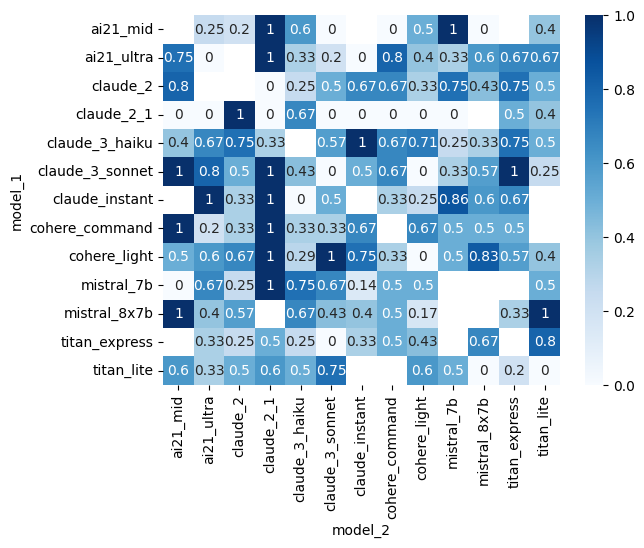

In [8]:
# Make a heatmap
import seaborn as sns
import matplotlib.pyplot as plt


sns.heatmap(results_matrix, annot=True, 
            # cmap from white to blue
            cmap="Blues",
            )
# plt.xticks(rotation=-45)

plt.show()